# Libraries

In [642]:
import pandas as pd
import numpy as np
import time
import datetime
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score,recall_score, precision_score, classification_report, confusion_matrix

#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import metrics
from easy_exchange_rates import API
import warnings
warnings.filterwarnings('ignore')

In [671]:
df=pd.read_csv("ArgusAuto.csv",sep=",")
df.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [672]:
df.drop('Mois',
  axis='columns', inplace=True)

In [673]:
df.drop('kilometrageparannée',
  axis='columns', inplace=True)

In [674]:
df.shape

(12899, 13)

In [675]:
today=datetime.date.today()
d1 = today.strftime("%Y-%m-%d")
api = API()
time_series = api.get_exchange_rates(
  base_currency="TND", 
  start_date=d1, 
  end_date=d1, 
  targets=["USD","EUR"]
)
data_frame = api.to_dataframe(time_series)
data_frame

,EUR,USD
2022-04-17,0.308266,0.333137


In [587]:
df['EUR']=data_frame['EUR'][0] * df['prix']

In [676]:
#define numeric variable and categorical variable to work separatly on them
num_col=['Kilométrage','Puissance','Année','age']
cat_cols=['lien','Region','Energie','Modèle','Marque','Boite','saison']

# 1) Transforming categorical columns values into integer values

In [677]:
le=preprocessing.LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [678]:
df

,lien,Energie,Kilométrage,Puissance,Année,Date Annonce,saison,Boite,Region,Modèle,Marque,age,prix
0,2,2,30000.0,4.0,2019.0,14/02/22,2,1,0,101,6,3.0,31000.0
1,2,2,7000.0,4.0,2021.0,14/02/22,2,1,3,34,5,1.0,39800.0
2,2,2,100000.0,4.0,2017.0,14/02/22,2,1,0,83,3,5.0,30500.0
3,2,2,67000.0,5.0,2019.0,14/02/22,2,1,2,7,3,3.0,27500.0
4,2,2,190000.0,5.0,2004.0,14/02/22,2,1,19,83,3,18.0,16800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12894,1,2,88000.0,7.0,2019.0,21/11/21,0,1,22,179,13,3.0,43000.0
12895,1,2,204000.0,5.0,2014.0,21/11/21,0,1,22,151,3,8.0,28200.0
12896,1,2,295000.0,7.0,1993.0,21/11/21,0,1,22,460,5,29.0,11300.0
12897,1,2,180000.0,6.0,2014.0,21/11/21,0,1,22,333,40,8.0,30000.0


# 2) Scaling Dataset

In [679]:
#scaling numerical data
norm = StandardScaler()
df['prix'] = np.log(df['prix'])
df['Kilométrage'] = norm.fit_transform(np.array(df['Kilométrage']).reshape(-1,1))
df['Puissance'] = norm.fit_transform(np.array(df['Puissance']).reshape(-1,1))
df['Année'] = norm.fit_transform(np.array(df['Année']).reshape(-1,1))
df['age'] = norm.fit_transform(np.array(df['age']).reshape(-1,1))
#df['EUR'] = norm.fit_transform(np.array(df['EUR']).reshape(-1,1))

#scaling target variable
q1,q3=(df['prix'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.prix>=o1) & (df.prix<=o2)]

In [680]:
dfC=df.copy()

In [681]:
"""Reindexing DataFrame so that price feature will at last"""
df=df.reindex(columns=['Energie', 'Kilométrage', 'Puissance','saison','Boite', 'Region', 'Modèle', 'Marque','age','prix'])

In [682]:
df

,Energie,Kilométrage,Puissance,saison,Boite,Region,Modèle,Marque,age,prix
0,2,-1.399397,-1.219737,2,1,0,101,6,0.017392,10.341742
1,2,-1.663480,-1.219737,2,1,3,34,5,0.016364,10.591622
2,2,-0.595666,-1.219737,2,1,0,83,3,0.018419,10.325482
3,2,-0.974568,-0.441400,2,1,2,7,3,0.017392,10.221941
4,2,0.437701,-0.441400,2,1,19,83,3,0.025098,9.729134
...,...,...,...,...,...,...,...,...,...,...
12894,2,-0.733449,1.115275,0,1,22,179,13,0.017392,10.668955
12895,2,0.598447,-0.441400,0,1,22,151,3,0.019961,10.247077
12896,2,1.643297,1.115275,0,1,22,460,5,0.030750,9.332558
12897,2,0.322883,0.336938,0,1,22,333,40,0.019961,10.308953


In [683]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [684]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

# 3) Model Implementation
### 1)Linear Regression
### 2)Ridge Regression
### 3)Lasso Regression
### 4)K-Neighbors Regressor
### 5)Adaboost Regressor
### 6)XGBoost
### 7)RandomForest

## 3.1) Linear Regression

In [685]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_predLR=LR.predict(X_test)

In [720]:
#calculating error/accuracy
y_test_LR,y_pred_LR=remove_neg(y_test,y_predLR)
r1_lr=result(y_test_LR,y_pred_LR)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 3.87771089e-03 -2.17942523e-01  1.55535380e-01  2.84859151e-02
 -2.70744148e-01  3.81709083e-03  6.89597701e-05  7.95942126e-04
 -5.24886908e-03]
MSLE : 0.0014060077298082567
Root MSLE : 0.037496769591636246
R2 Score : 0.33395124500524787 or 33.3951%


In [722]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_predLR, target_names=target_names))

ValueError: continuous is not supported

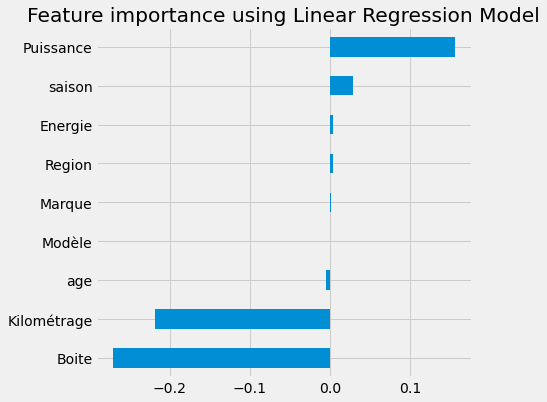

In [689]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

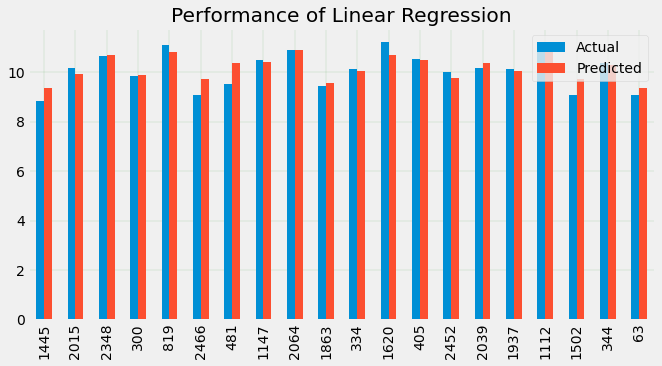

In [690]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

## 3.2) Ridge regression

In [691]:
#predicting value of alpha
r_alphas = np.logspace(0, 5, 100)
model = RidgeCV(alphas=r_alphas,scoring='r2')
#visualizer = AlphaSelection(model)
model=model.fit(X_train,y_train)
#visualizer.show()
#visualizer.fit(X_train,y_train).get_params


In [603]:
# from sklearn.model_selection import RepeatedKFold
# # define model
# model = Ridge()
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define grid
# grid = dict()
# grid['alpha'] = np.arange(0, 1, 0.01)
# # define search
# search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # perform the search
# results = search.fit(X_train, y_train)
# # summarize
# print('Config: %s' % results.best_params_)

In [692]:
#model object and fitting model
RR=Ridge(alpha=0.0)
RR.fit(X_train,y_train)
y_predRR=RR.predict(X_test)

In [693]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_predRR)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0014060077298082567
Root MSLE : 0.037496769591636246
R2 Score : 0.3339512450052481 or 33.3951%


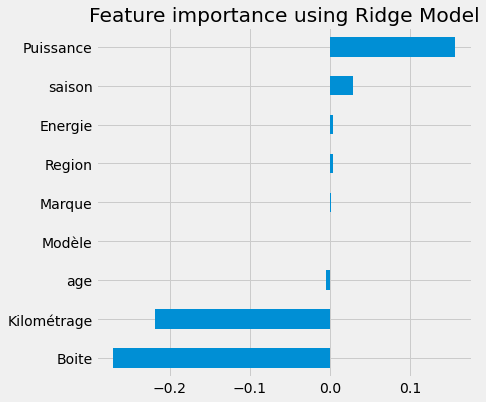

In [694]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

## 3.3) Lasso Regression

In [695]:
#model object and fitting it
lasso=LassoCV(cv=10,random_state=0)
lasso.fit(X_train,y_train)
y_predLRR=lasso.predict(X_test)

In [696]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_predLRR)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.0014313409949514712
Root MSLE : 0.03783306748006922
R2 Score : 0.32137794664494357 or 32.1378%


## 3.4) KNN

In [697]:
#estimating MSLE for k=1-9
k_range=list(range(1,10))
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.037337533114800966
K = 2  , Root MSLE = 0.03400102802767801
K = 3  , Root MSLE = 0.03277448100049686
K = 4  , Root MSLE = 0.0328494976755093
K = 5  , Root MSLE = 0.03320821224043837
K = 6  , Root MSLE = 0.03325155759131314
K = 7  , Root MSLE = 0.03338403168610847
K = 8  , Root MSLE = 0.03360607819276687
K = 9  , Root MSLE = 0.03361289966331082


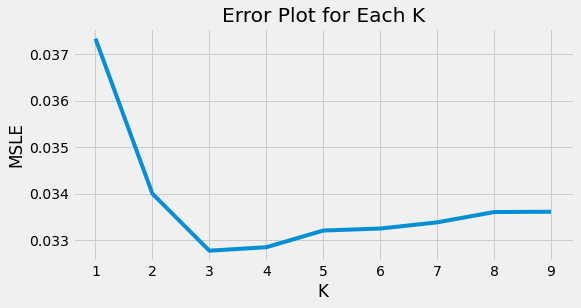

In [698]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [611]:
# # create a parameter grid: map the parameter names to the values that should be searched
# # simply a python dictionary
# # key: parameter name
# # value: list of values that should be searched for that parameter
# # single key-value pair for param_grid
# param_grid = dict(n_neighbors=k_range)
# print(param_grid)

In [555]:
# # instantiate the grid
# grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy')

In [110]:
# # fit the grid with data
# grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [111]:
# print(grid.best_params_)

{'n_neighbors': 1}


In [699]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=1) 
KNN.fit(X_train,y_train)
y_predKNN=KNN.predict(X_test)

In [700]:
#model evaluation
r4_knn=result(y_test,y_predKNN)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.0013940913790988587
Root MSLE : 0.037337533114800966
R2 Score : 0.341371816595477 or 34.1372%


In [701]:
accu.to_csv('errors.csv')

## 3.5) Adaboost

In [415]:
# dst = DecisionTreeRegressor()
# parameters = {
#               'max_depth': [5,10, 15,20],
#               }
# dst_grid = GridSearchCV(dst,
#                         parameters,
#                         cv =10,
#                         n_jobs = -1,
#                         verbose=True)
# dst_grid.fit(X_train,
#          y_train)
# print(dst_grid.best_score_)
# print(dst_grid.best_params_)

In [416]:
# adb =AdaBoostRegressor()
# parameters = {'n_estimators':[100,200,300,400],
#               'learning_rate': [0.3,0.4,0.5,0.6]
#               }
# adb_grid = GridSearchCV(adb,
#                         parameters,
#                         cv =10,
#                         n_jobs = -1,
#                         verbose=True)
# adb_grid.fit(X_train,
#          y_train)
# print(adb_grid.best_score_)
# print(adb_grid.best_params_)

In [702]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=10),
    n_estimators=300,learning_rate=0.3
)

ABR.fit(X_train, y_train)
y_predABR = ABR.predict(X_test)

In [703]:
#model evaluation
r7_ab=result(y_test,y_predABR)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0006996009747014047
Root MSLE : 0.026449971166362444
R2 Score : 0.6656757021743199 or 66.5676%


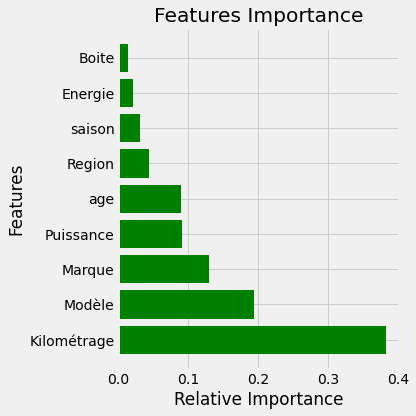

In [704]:
importances=ABR.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [705]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')

## 3.6) XGBOOST

In [421]:
# xgb1 = xgb.XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear','reg:squarederror'],
#               'learning_rate': [0.3, 0.4,0.5], #so called `eta` value
#               'max_depth': [5, 10, 15,20],
#               'min_child_weight': [4],
#               'n_estimators': [100,200,300,400],
#                'alpha':[1,2,3,4,5]
#               }

# xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv =10,
#                         n_jobs = -1,
#                         verbose=True)

# xgb_grid.fit(X_train,
#          y_train)
# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [706]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_train,y_train)
y_predXG = xg_reg.predict(X_test)

[21:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [707]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_predXG)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.0005564186244635891
Root MSLE : 0.023588527390737836
R2 Score : 0.7357260792799649 or 73.5726%


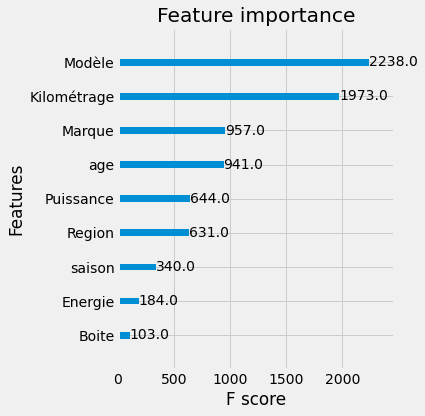

In [708]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

In [723]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_predXG, target_names=target_names))

ValueError: continuous is not supported

In [709]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

## 3.7) Random Forest 

In [572]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [427]:
# param_grid = { 
#     'n_estimators': [60,120,180,200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'min_samples_leaf' : [1,2,3,4,5],
#     'n_jobs':[-1,0,1]
# }

In [428]:
#  grid = GridSearchCV(RandomForestRegressor(random_state=1), param_grid=param_grid, cv=10)

In [429]:
#  grid.fit(X_train, y_train)

In [430]:
#  grid.best_params_

In [710]:
#n_estimator correspondant au nombre initial d’arbres dans le modèle 
#min sample leaf au nombre minimum d’échantillons requis pour diviser un nœud interne
RFR = RandomForestRegressor(n_estimators=200,random_state=0, min_samples_leaf=2, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_predRF = RFR.predict(X_test)

In [711]:
r5_rf=result(y_test,y_predRF)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf
accu.to_csv('errors.csv')

MSLE : 0.0006214212456119361
Root MSLE : 0.024928322157977984
R2 Score : 0.7040682551510052 or 70.4068%


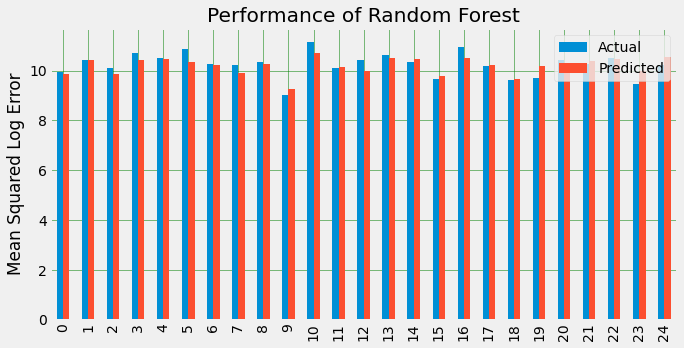

In [712]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

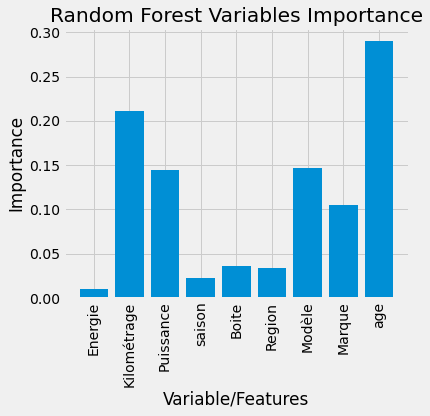

In [713]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

# Overall Result

In [714]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,AdaBoost Regressor,XGBoost Regressor,RandomForest Regressor
MSLE,0.001406,0.001406,0.001431,0.001394,0.000700,0.000556,0.000621
Root MSLE,0.037497,0.037497,0.037833,0.037338,0.026450,0.023589,0.024928
R2 Score,0.333951,0.333951,0.321378,0.341372,0.665676,0.735726,0.704068
Accuracy(%),33.395100,33.395100,32.137800,34.137200,66.567600,73.572600,70.406800


In [715]:
model_accuracy=accu.loc['Accuracy(%)']

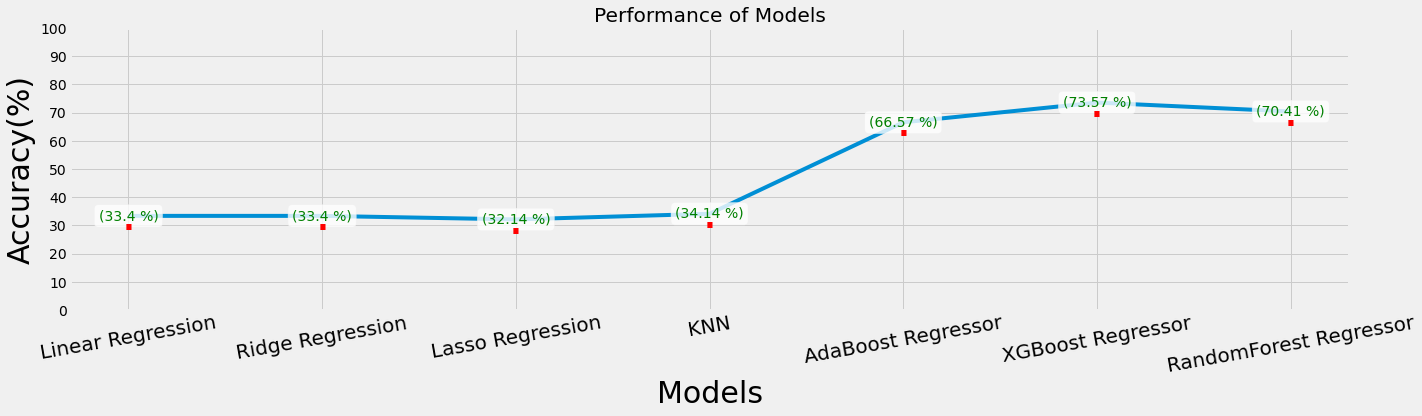

In [716]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();

In [717]:
print ('\n clasification report for Discriminant Analysis:\n', classification_report(y_test,y_predLR))

ValueError: continuous is not supported